## Introduction

Chain-of-Thought (CoT) [@wei2022chain] is a technique that enhances the reasoning capabilities of large language models (LLMs). It breaks down complex tasks into multiple intermediate reasoning steps to help LLMs to reach the final answer. It uses LLMs' capability to do few-shot prompting for reasoning taks.
The basic idea is to include chain of thought example(s) in prompting, as illustrated in the following figure:

<div style="text-align: center;">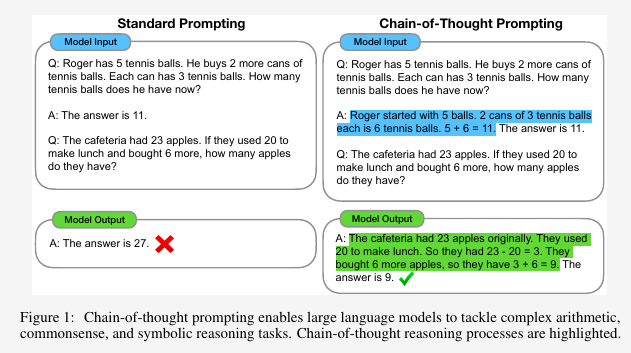

Source: Wei et al. [@wei2022chain]
</div>

The authors listed several attractive properties of CoT prompting:

- allows LLMs to decompose multi-step problems into intermediate reasoning steps 
- reveals how LLms reach a specific answer and helps debug when the reasoning path is wrong
- useful for solving language-based tasks, such as math word problems, commonsense reasoning,  and symbolic manipulation.
- can be used in off-the-shelf LLMs by including CoT examples in few-shot prompting

## Math reasoning
Three key observations from their math reasoning experiments:

1. CoT prompting improves performance only when models are large enough, i.e. ∼100B parameters.
2. CoT prompting does better job at more complex reasoning problems.
3. CoT prompting with the GPT-3 175B and PaLM 540B shows a strong performance compared to the previous state-of-the-art results.

## Commonsense Reasoning
The paper claims that CoT prompting is applicable to commonsense reasoning problems involving reasoning about physical and human interactions under the presumption of general background knowledge. Experiment results show that CoT prompting improves the performance of PaLM on all tasks, with PaLM 540B achiving new SoTA results on StrategyQA, and outperforming an unaided sports enthusiast on Sports Understanding.

## Symbolic Reasoning
The authors did two toy tasks for symbolic reasoning: last letter concatenation and coin flip. They are simple for humans but potentially challenging for LLMs.  Each task has both in-domain and out-of-domain test sets. 
Their experimental results indicate that CoT prompting allows LLMs to perform challenging symbolic reasoning tasks, and able to handle more reasoning steps for inference-time inputs.
CoT prompting also leads to almost 100% solve rates for PaLM 540B on the in-domain test sets, and upward scaling curves for the out-of-domain test sets.

## A quick experiment of CoT

In [16]:
#| echo: false
import sys
sys.path.append('../src')

### using standard few-shot prompting

In [17]:
#| code-fold: true
#| code-summary: Import libs and functions (click to toggle the content)
import yaml
import openai

from openai_utils import chat_completion

In [18]:
#| code-fold: true
#| code-summary: Enter OpenAI API Key (click to toggle the content)
from getpass import getpass

openai.api_key = getpass()

 ········


In [78]:
prompt = """
Question: John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is?
Answer Choices: 
(A) 50
(B) 45
(C) 65
(D) 78
(E) 64

```yaml
Choice: A
```


Answer the following question using the given answer format:
Question: A grocery sells a bag of ice for $1.25, and makes 20% profit. If it sells 500 bags of ice, how much total profit does it make?
Answer Choices: 
(A) $275
(B) $150
(C) $225
(D) $250
(E) $125

Answer Format:
```yaml
Choice: [Letter of your choice only]
```
"""

messages = [
    {'role': 'user', 'content': prompt}
]
response, _ = chat_completion(messages)

print(response)

Choice: (C) $225


In [79]:
yaml.safe_load(response)

{'Choice': '(C) $225'}

*The answer is wrong. The correct answer should be (E).*

### using CoT prompting

In [80]:
prompt = """
Question: John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is?
Answer Choices: 
(A) 50
(B) 45
(C) 65
(D) 78
(E) 64

```yaml
# Reasoning: Profit per bag = 1.25 * 0.20 = 0.25 , Total profit = 500 * 0.25 = 125 , Answer is A
Choice: A
```


Answer the following question using the given answer format:
Question: A grocery sells a bag of ice for $1.25, and makes 20% profit. If it sells 500 bags of ice, how much total profit does it make?
Answer Choices: 
(A) $275
(B) $150
(C) $225
(D) $250
(E) $125

Answer Format:
```yaml
# Reasoning: [Provide your reasoning here]
Choice: [Letter of your choice only]
```
"""

messages = [
    {'role': 'user', 'content': prompt}
]
response, _ = chat_completion(messages)

print(response)

# Reasoning: Profit per bag = 1.25 * 0.20 = 0.25 , Total profit = 500 * 0.25 = 125 , Answer is E

Choice: E


In [81]:
yaml.safe_load(response)

{'Choice': 'E'}